## I. The "Final Boss" of Machine Learning

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# input feature
x = np.linspace(0, 2*np.pi, 100)

# noise
np.random.seed(321)
noise = np.random.normal(0, .5, 100)

# target variable
y = np.sin(x) + noise
# Create DataFrame with x and y
df = pd.DataFrame({'x' : x, 'y': y})
df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448


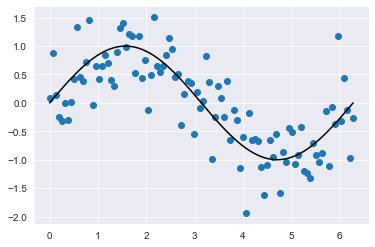

In [3]:
# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, np.sin(df.x), color='k')

plt.show()

## II. Flaws of Linear Regression

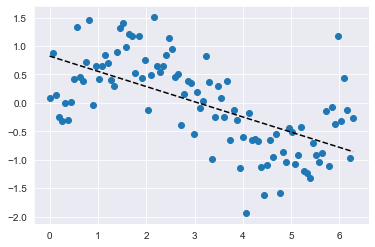

In [4]:
from sklearn.linear_model import LinearRegression
# Initialize model instance
lm = LinearRegression()

# Separate input feature(s) and target variable
X = df.drop('y', axis=1)
y = df.y

# Fit model
lm.fit(X, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, lm.predict(X), 'k--')

plt.show()

In [5]:
df_garbage = df.copy()

# Set seed for reproducible results
np.random.seed(555)

# Create 99 garbage features
for n in range(1, 100):
    df_garbage['g{}'.format(n)] = np.random.uniform(0, 2*np.pi, 100)

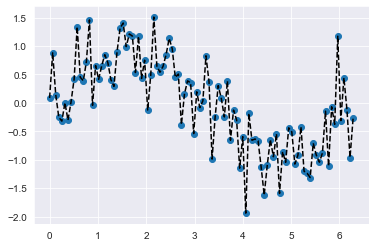

In [6]:
# Garbage input features
X_garbage = df_garbage.drop('y', axis=1)

# Fit model on garbage features
lm_garbage = LinearRegression()
lm_garbage.fit(X_garbage, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, lm_garbage.predict(X_garbage), 'k--')

plt.show()

## III. Regularized Regression

In [7]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

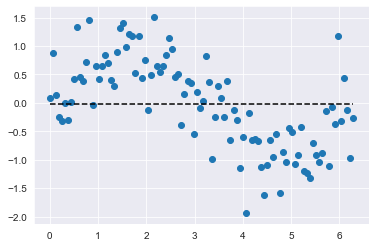

In [8]:
lasso = Lasso(random_state=1234)
lasso.fit(X_garbage, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, lasso.predict(X_garbage), 'k--')

plt.show()

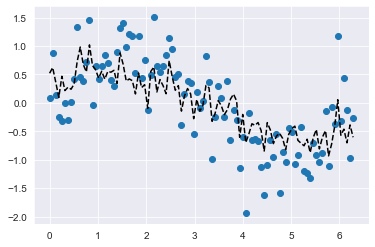

In [9]:
lasso2 = Lasso(alpha=0.1, random_state=1234)
lasso2.fit(X_garbage, y)
# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, lasso2.predict(X_garbage), 'k--')

plt.show()

In [10]:
lasso2.coef_

array([-0.22232828,  0.        , -0.        , -0.00759667,  0.        ,
        0.        , -0.        , -0.03601924, -0.        ,  0.00433404,
        0.        , -0.02505424, -0.01967545,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.026227  ,
       -0.        ,  0.00728013,  0.        ,  0.0148694 , -0.        ,
       -0.        , -0.        , -0.02186635, -0.        , -0.        ,
       -0.01356253,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.00090083, -0.        ,
        0.00258886,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00085948,  0.        ,  0.        , -0.0046698 , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.01597034,
       -0.01172187,  0.        , -0.        , -0.01543636, -0.        ,
        0.        , -0.01006564, -0.00366761,  0.        ,  0.02

## IV. Ensemble Methods

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## <span style="color:RoyalBlue"> 4.1 - Checking the Work</span>

#### A.) Checking that the simulated noisy sine dataset has been re-simulated. Plotting the scatterplot.

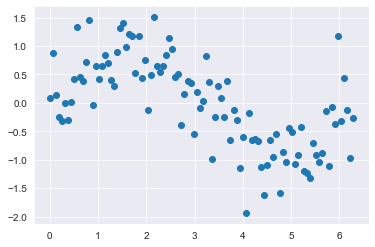

In [12]:
# Scatterplot of x and y
plt.scatter(df.x, df.y)
plt.show()

#### B.) Checking that I've successfully created the "garbage" dataset with 99 useless input features.  Display the first 5 observations from  <code>df_garbage</code>.

In [13]:
df_garbage.head()


,x,y,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,...,g50,g51,g52,g53,g54,g55,g56,g57,g58,g59,g60,g61,g62,g63,g64,g65,g66,g67,g68,g69,g70,g71,g72,g73,g74,g75,g76,g77,g78,g79,g80,g81,g82,g83,g84,g85,g86,g87,g88,g89,g90,g91,g92,g93,g94,g95,g96,g97,g98,g99
0,0.000000,0.086260,4.510285,4.243360,5.077364,5.775407,0.870371,1.042189,3.288845,1.005865,1.052502,3.175580,5.895522,5.870488,3.903133,2.668519,3.282817,4.094173,0.880424,2.996213,3.118989,1.147824,2.837148,2.839650,0.409650,3.642829,1.642933,1.301822,3.908672,1.028190,6.184563,0.906429,3.453761,5.314957,5.858500,5.133156,4.603108,3.380052,1.475456,3.803071,1.342119,3.534845,5.418094,5.925285,2.783191,2.837559,3.204982,4.144391,5.980749,6.227680,...,5.363106,4.839501,0.960421,0.408669,6.235134,2.954037,2.163008,3.038309,5.987287,5.411146,5.856653,4.570137,4.736102,6.229399,6.073511,0.893500,1.589484,5.690909,5.878595,0.365318,5.848337,3.098962,3.421179,3.973730,3.326170,3.087506,1.867172,4.839791,1.999900,3.886663,2.556170,5.712216,4.048645,5.348714,3.372741,4.380841,1.461631,1.911605,5.457319,3.004112,1.739148,0.401207,2.986740,3.419816,2.210869,4.116052,5.651802,2.931066,1.542499,2.299154
1,0.063467,0.881165,0.300683,2.204225,0.492213,5.097731,0.541594,0.343164,4.840217,4.343630,3.149967,2.076274,1.759298,5.444094,2.938032,4.200197,1.199190,3.979148,1.598494,1.758741,4.024471,3.951020,5.422190,4.514172,4.459619,3.159930,2.901864,0.695287,3.383681,2.629020,2.315087,0.769659,5.558526,2.897195,4.162310,2.788518,1.778288,4.323651,0.896190,3.713252,2.051931,4.212852,2.696321,0.429951,4.825293,0.743045,1.208494,0.011320,1.930851,2.532398,...,3.947482,5.851334,0.134162,3.437023,3.893171,1.756536,1.058794,2.976196,1.201085,5.513009,5.889551,6.090618,0.864594,3.960307,0.682757,4.816860,0.939704,6.267313,6.160211,4.368340,0.290720,5.458159,5.001682,2.887322,6.169497,4.332155,3.736490,2.409075,6.151429,6.208335,3.504041,4.846901,1.929619,2.411624,2.592169,1.236924,1.991130,2.231070,5.871841,1.519105,0.372066,2.432486,1.130922,0.067541,2.857747,5.934834,5.213061,5.579050,4.092146,4.464422
2,0.126933,0.145261,5.934292,4.499745,5.629712,0.721088,4.499597,1.054771,3.207139,2.356321,2.537807,1.889433,4.656596,4.494877,1.194202,4.760009,1.207124,3.588651,4.299645,2.416517,5.071783,1.871949,5.002775,3.996491,2.397042,2.290254,5.528217,1.017353,1.718960,5.290628,5.531407,0.835479,1.563958,4.339918,2.985258,1.966871,3.504641,5.421886,1.755435,5.266469,1.076330,2.430177,3.066581,6.143974,2.935596,5.280540,3.903075,4.433316,2.250051,4.321500,...,4.673700,4.370303,4.670778,4.273211,0.132446,3.980181,3.759853,5.298938,0.398279,1.049623,1.362105,0.049970,6.213079,5.819508,6.259281,3.599359,4.525876,0.989356,2.649699,0.107822,2.293262,2.864385,4.091935,6.132996,5.655899,3.972261,4.055669,4.399490,1.990648,0.988087,2.996496,6.040177,2.232170,2.774042,6.055675,2.695219,1.535565,0.155993,2.990297,1.929394,0.254268,3.335856,5.061090,0.854903,1.861820,0.216191,4.707951,1.171044,3.402163,5.652485
3,0.190400,-0.252824,4.312653,1.798761,6.126937,0.804294,4.019667,5.314475,3.989411,2.739722,3.497290,1.722815,6.185798,4.289519,2.196523,4.345576,1.969896,2.191259,0.942655,3.874540,1.176396,5.422721,1.962456,6.161889,2.249732,4.839469,1.383888,4.113686,4.296099,4.355895,1.858601,4.973328,3.050362,0.032895,5.773996,2.074032,1.523783,2.329209,0.970743,5.725764,3.163545,1.827271,5.849702,1.636496,2.248112,1.238136,0.406243,3.651160,3.227052,1.671514,...,2.496149,5.247725,4.076593,0.113816,2.536973,0.913940,4.666268,5.025258,1.228076,3.532962,3.878686,5.955161,4.445355,5.922151,1.837340,2.228289,0.254234,5.875696,3.738087,0.538353,3.082641,4.559514,0.776358,4.498631,2.356502,2.334325,1.920327,3.121354,3.930723,5.660037,0.922580,0.415104,5.080458,4.569396,6.111622,5.518925,0.470294,1.277002,1.263333,1.807333,0.749275,0.430104,3.887071,0.294676,0.168721,4.298122,5.752676,5.008056,3

#### C.) Finally, confirming that I've separated out <code>X_garbage</code> (just the input features for the "garbage" dataset). Printing all the column names of <code>X_garbage</code>.
* **Tip:** If the output is truncated, you may want to convert it into a <code>list()</code> before printing it.

In [14]:
print(list(X_garbage.columns))

['x', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g16', 'g17', 'g18', 'g19', 'g20', 'g21', 'g22', 'g23', 'g24', 'g25', 'g26', 'g27', 'g28', 'g29', 'g30', 'g31', 'g32', 'g33', 'g34', 'g35', 'g36', 'g37', 'g38', 'g39', 'g40', 'g41', 'g42', 'g43', 'g44', 'g45', 'g46', 'g47', 'g48', 'g49', 'g50', 'g51', 'g52', 'g53', 'g54', 'g55', 'g56', 'g57', 'g58', 'g59', 'g60', 'g61', 'g62', 'g63', 'g64', 'g65', 'g66', 'g67', 'g68', 'g69', 'g70', 'g71', 'g72', 'g73', 'g74', 'g75', 'g76', 'g77', 'g78', 'g79', 'g80', 'g81', 'g82', 'g83', 'g84', 'g85', 'g86', 'g87', 'g88', 'g89', 'g90', 'g91', 'g92', 'g93', 'g94', 'g95', 'g96', 'g97', 'g98', 'g99']


## <span style="color:RoyalBlue"> 4.2 - Lasso Regression</span>

#### A.) Fitting and plotting a Lasso Regression with penalty <code>alpha=1.0</code>.


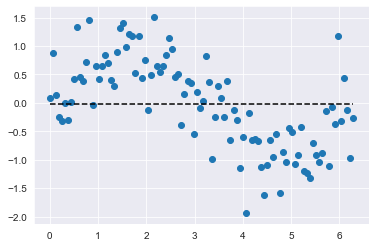

In [15]:
# Default alpha=1.0
lasso = Lasso(alpha=1.0, random_state=1234)
lasso.fit(X_garbage, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, lasso.predict(X_garbage), 'k--')
plt.show()

#### B.) Increasing penalty strength to 2.0 (test).

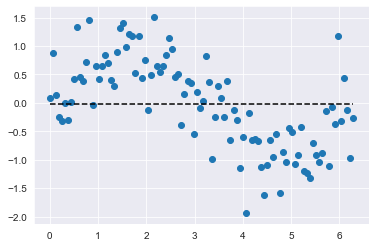

In [16]:
lasso = Lasso(alpha=2.0, random_state=1234)
lasso.fit(X_garbage, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, lasso.predict(X_garbage), 'k--')
plt.show()

#### C.) Looping through the following 5 candidate values for penalty strength. Fiting and plotting Lasso Regressions on the garbage dataset using each one.

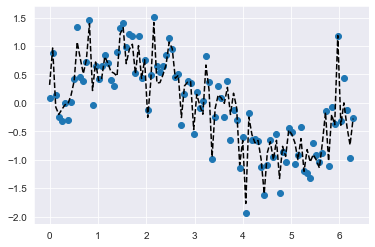

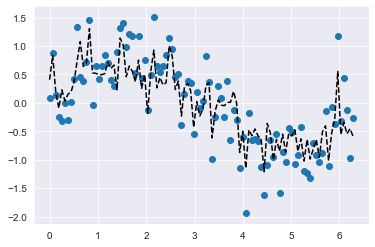

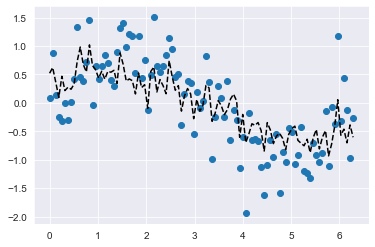

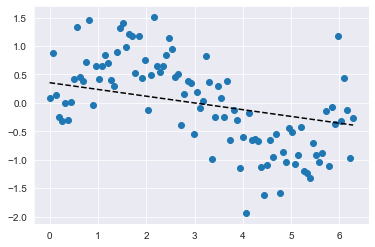

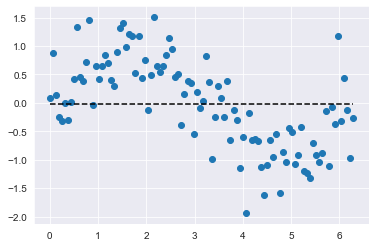

In [17]:
vals = [0.01, 0.05, 0.1, 0.5, 1]
for i in vals: 
    # Default alpha=1.0
    lasso = Lasso(alpha=i, random_state=1234)
    lasso.fit(X_garbage, y)

    # Scatterplot of x and y
    plt.scatter(df.x, df.y)

    # Overlay the sine wave
    plt.plot(df.x, lasso.predict(X_garbage), 'k--')
    plt.show()

## <span style="color:RoyalBlue"> 4.3 - Ridge Regression</span>

#### A.) Fitting and plotting a Ridge Regression on the garbage dataset with <code>alpha=1.0</code> and <code>random_state=1234</code>.

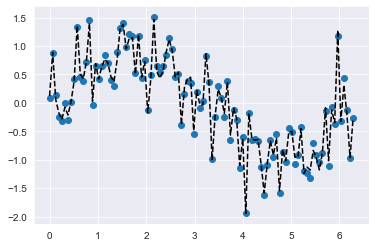

In [18]:
# Default alpha=1.0
ridge = Ridge(alpha=1.0, random_state=1234)
ridge.fit(X_garbage, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, ridge.predict(X_garbage), 'k--')
plt.show()

#### B.) Reducing penalty strength to <code>alpha=0.5</code> (test).

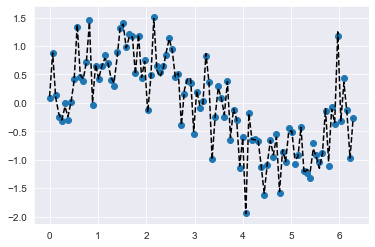

In [19]:
# Default alpha=1.0
ridge = Ridge(alpha=0.5, random_state=1234)
ridge.fit(X_garbage, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, ridge.predict(X_garbage), 'k--')
plt.show()

#### C.) Looping through penalty test values. Fitting and plotting Ridge regression based on penalty.

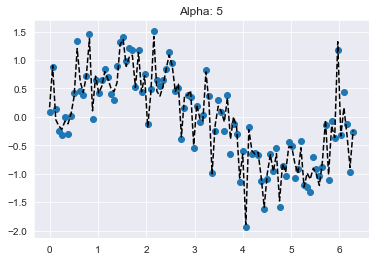

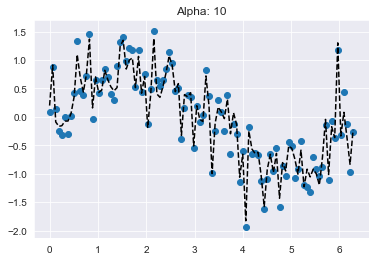

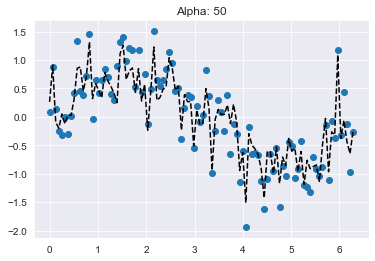

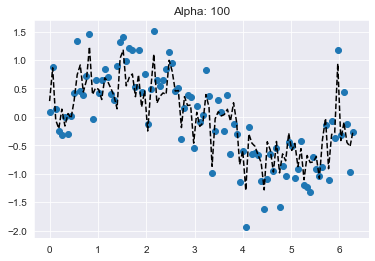

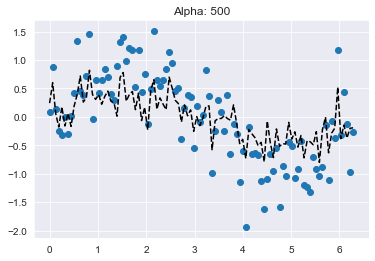

In [20]:
for penalty in [5, 10, 50, 100, 500]:
    ridge = Ridge(alpha=penalty, random_state=1234)
    ridge.fit(X_garbage, y)

    # Scatterplot of x and y
    plt.scatter(df.x, df.y)

    # Overlay the sine wave
    plt.plot(df.x, ridge.predict(X_garbage), 'k--')
    plt.title('Alpha: {}'.format(penalty))
    plt.show()

#### D.) Increasing penalty strength to 1000000 (test). 

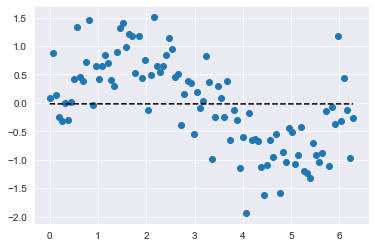

In [21]:
# Default alpha=1.0
ridge = Ridge(alpha=1000000, random_state=1234)
ridge.fit(X_garbage, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, ridge.predict(X_garbage), 'k--')
plt.show()

#### E.) Confirming that the coefficients of the Ridge Regression model are not actually set to 0.

In [22]:
print(ridge.coef_)

[-8.98022574e-05  4.41088385e-07 -1.43924612e-05 -1.49860571e-05
  3.23136505e-06  3.27530631e-06 -8.57732789e-06 -2.61953858e-05
 -1.02764385e-05  1.74731761e-05  5.77566747e-06 -2.27090554e-05
 -2.22997660e-05  5.99054363e-06  2.26230427e-06 -6.10233417e-06
 -1.87544707e-05 -2.99009828e-07 -9.32589922e-07  3.13282607e-05
 -1.65951697e-05  1.60846561e-05  1.10056452e-05  1.44861312e-05
  1.52590996e-06 -2.11637988e-05 -1.17025275e-05 -3.07646525e-05
 -5.41084113e-06 -1.78776591e-05 -2.58166120e-05 -7.48631925e-06
  2.51380531e-05 -1.09544810e-05  2.23327670e-05 -8.29239455e-06
  2.14735395e-05  1.47493727e-05  3.56466949e-07 -1.37609061e-05
 -8.73168765e-06 -3.66633737e-07  2.04236425e-06  2.39487315e-05
 -1.58581476e-06  1.17022934e-05  1.39841740e-05  1.21824427e-05
  3.87633845e-06 -1.19527102e-05  3.01767823e-05  9.64841995e-06
  8.15594447e-06 -2.67779329e-05  7.15212114e-06 -1.02466553e-05
 -2.15254042e-05  2.91733371e-06 -1.84361781e-05  1.46868987e-05
 -2.22489128e-05  1.32962

## <span style="color:RoyalBlue"> 4.4 - Elastic-Net</span>

#### A.) Fitting and plotting an Elastic-Net that uses the default hyperparameter values.

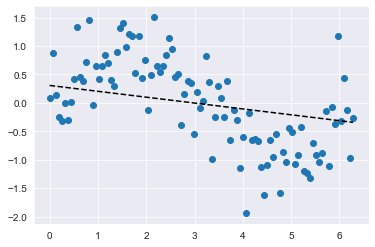

In [23]:
enet = ElasticNet(alpha=1.0,
                  l1_ratio=0.5,
                  random_state=1234)

enet.fit(X_garbage, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, enet.predict(X_garbage), 'k--')
plt.show()

#### B.) Next, printing the coefficients of the elastic-net model.

In [24]:
print(enet.coef_)

[-0.1033666  0.        -0.        -0.         0.         0.
 -0.        -0.        -0.         0.         0.        -0.
 -0.         0.         0.        -0.        -0.         0.
 -0.         0.        -0.         0.         0.         0.
 -0.        -0.        -0.        -0.        -0.        -0.
 -0.        -0.         0.        -0.         0.        -0.
  0.         0.        -0.        -0.        -0.        -0.
  0.         0.        -0.         0.         0.         0.
  0.        -0.         0.         0.         0.        -0.
  0.        -0.        -0.         0.        -0.         0.
 -0.         0.        -0.        -0.        -0.         0.
 -0.        -0.         0.         0.         0.         0.
  0.         0.         0.        -0.         0.        -0.
 -0.         0.         0.         0.        -0.        -0.
 -0.         0.        -0.         0.         0.        -0.
  0.         0.        -0.         0.         0.         0.
  0.        -0.        -0.         0.   

#### C.) Setting <code>l1_ratio = 0.9</code> as test.

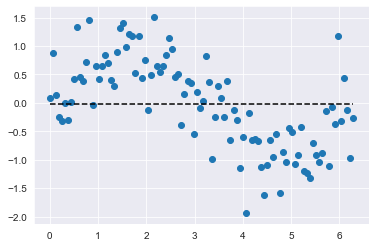

In [25]:
enet = ElasticNet(alpha=1.0,
                  l1_ratio=0.9,
                  random_state=1234)

enet.fit(X_garbage, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, enet.predict(X_garbage), 'k--')
plt.show()

#### D.) Displaying the coefficients of the elastic-net with <code>l1_ratio = 0.9</code>.

In [26]:
print(enet.coef_)

[-0.  0. -0. -0.  0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0. -0.
 -0.  0. -0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.
  0.  0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0. -0.
  0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
 -0.  0. -0.  0.  0.  0.  0. -0. -0.  0.]


#### E.) Setting <code>l1_ratio = 0.1</code> as test.

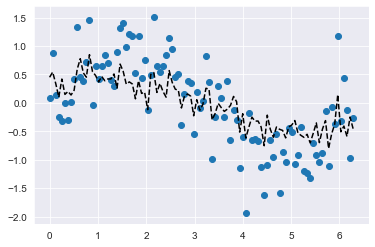

In [27]:
enet = ElasticNet(alpha=1.0,
                  l1_ratio=0.1,
                  random_state=1234)

enet.fit(X_garbage, y)

# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, enet.predict(X_garbage), 'k--')
plt.show()

#### F.) Displaying the coefficients of the elastic-net with <code>l1_ratio = 0.1</code>.

In [28]:
print(enet.coef_)

[-1.68786818e-01  0.00000000e+00 -0.00000000e+00 -8.69081194e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -2.74644068e-02
 -0.00000000e+00  6.10833269e-03  0.00000000e+00 -2.18782907e-02
 -2.08478104e-02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -1.34108154e-03  0.00000000e+00 -0.00000000e+00  2.67402422e-02
 -6.04518012e-05  9.18142722e-03  0.00000000e+00  6.63515493e-03
 -0.00000000e+00 -5.80086654e-03 -0.00000000e+00 -2.18650865e-02
 -0.00000000e+00 -0.00000000e+00 -1.54386802e-02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  8.23499114e-03
 -0.00000000e+00  2.35320954e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.05831559e-02  0.00000000e+00
  0.00000000e+00 -1.25327207e-02 -0.00000000e+00  0.00000000e+00
 -5.51802084e-03  0.00000000e+00 -5.66401067e-04  1.07939263e-02
 -1.45990846e-02  0.00000

#### G.) Looping through and trying elastic-nets with the candidate <code>l1_ratio</code> values of <code>[0.1, 0.3, 0.5, 0.7, 0.9]</code>.

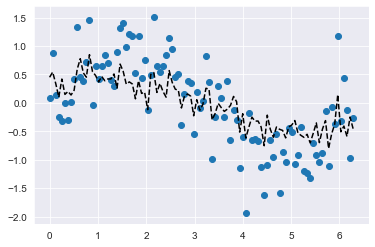

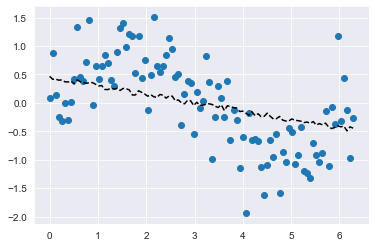

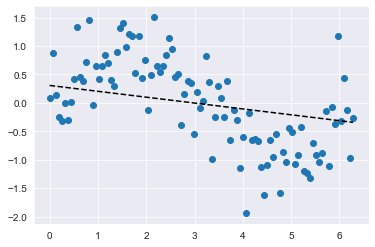

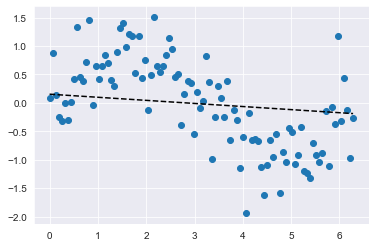

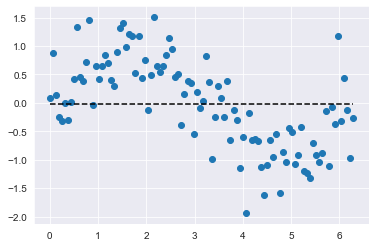

In [29]:
for i in [0.1, 0.3, 0.5, 0.7, 0.9]:  
    enet = ElasticNet(alpha=1.0,
                      l1_ratio=i,
                      random_state=1234)

    enet.fit(X_garbage, y)

    # Scatterplot of x and y
    plt.scatter(df.x, df.y)

    # Overlay the sine wave
    plt.plot(df.x, enet.predict(X_garbage), 'k--')
    plt.show()